In [135]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import epics
import time as ttime

%run -i lakeshore_comm.py

# Calibration Table information
## Omega Thermistor Model(s) 44004 & 44033

The calibration curve is supplied by omega as a table.  See http://www.omega.com/techref/pdf/z256-257.pdf .

Applicable specific models:
* ON-9005-44004


## Usage recommendations:
The notebook needs write permission to epics.  One way to ensure this is to use a beamline workstation and execute the following commands before opening the notebook.
```shell
source activate collection
ipython notebook
```

The Lakeshore 336 calibration tables 21 - 59 are reserved for users.  First check to make sure that you are not about to overwrite a calibration. The temperature column should be in decreasing order.

In [147]:
tempC = np.arange(-80, 151, 1)
resistOHM = np.array([1660000,1518000,1390000,1273000,1167000,1071000,982800,902700,829700,763100,
                      702300,646700,595900,549400,506900,467900,432200,399500,369400,341800,316500,
                      293200,271700,252000,233800,217100,201700,187400,174300,162200,151000,140600,
                      131000,122100,113900,106300,99260,92720,86650,81020,75790,70930,66410,62210,58300,
                      54660,51270,48110,45170,42420,39860,37470,35240,33150,31200,29380,27670,26070,24580,
                      23180,21870,20640,19480,18400,17390,16430,15540,14700,13910,13160,12460,11810,11190,
                      10600,10050,9534,9046,8586,8151,7741,7355,6989,6644,6319,6011,5719,5444,5183,4937,
                      4703,4482,4273,4074,3886,3708,3539,3378,3226,3081,2944,2814,2690,2572,2460,2354,2252,
                      2156,2064,1977,1894,1815,1739,1667,1599,1533,1471,1412,1355,1301,1249,1200,1152,1107,1064,
                      1023,983.8,946.2,910.2,875.8,842.8,811.3,781.1,752.2,724.5,697.9,672.5,648.1,624.8,602.4,
                      580.9,560.3,540.5,521.5,503.3,485.8,469.0,452.9,437.4,422.5,408.2,394.5,381.2,368.5,356.2,
                      344.5,333.1,322.3,311.8,301.7,292.0,282.7,273.7,265.0,256.7,248.6,240.9,233.4,226.2,219.3,
                      212.6,206.1,199.9,193.9,188.1,182.5,177.1,171.9,166.9,162.0,157.3,152.8,148.4,144.2,140.1,
                      136.1,132.3,128.6,125.0,121.6,118.2,115.0,111.8,108.8,105.8,103.0,100.2,97.6,95.0,92.5,90.0,
                      87.7,85.4,83.2,81.1,79.0,77.0,75.0,73.1,71.3,69.5,67.8,66.1,64.4,62.9,61.3,59.8,58.4,57.0,55.6,
                      54.3,53.0,51.7,50.5,49.3,48.2,47.0,45.9,44.9,43.8,42.8,41.9])
tempK=tempC+273.15

<IPython.core.display.Javascript object>


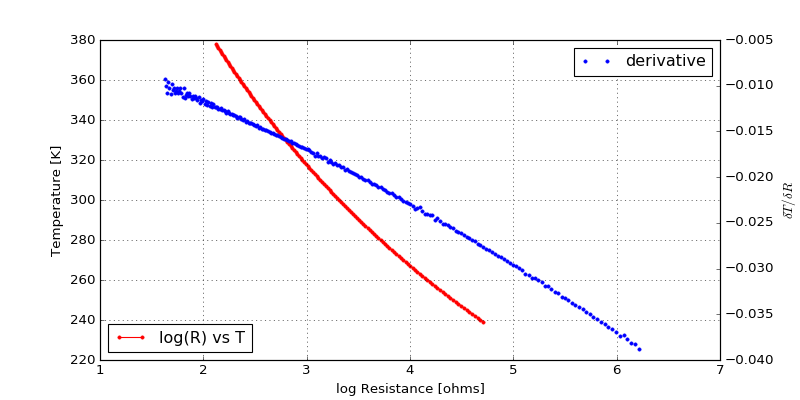

In [146]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(resistOHM[46:-45]), tempK[46:-45], 'r.-',label='log(R) vs T')
plt.ylabel('Temperature [K]')
plt.xlabel('log Resistance [ohms]')
plt.grid(True)
plt.legend(loc=3)
ax1 = plt.gca().twinx()
ax1.plot(np.log10(resistOHM[:-1]), np.diff(np.log10(resistOHM)) / np.diff(tempK), 'b.',label='derivative')
ax1.set_ylabel('$\delta T / \delta R$')
plt.legend()



## Create data to upload
This sensor is designed to upload log(R)


In [148]:
tempK_r = tempK[::-1]
r_r = resistOHM[::-1]

In [149]:
t = tempK_r[45:-46]
r = r_r[45:-46]
op = lakeshore_curv(33, 'TH-9005-44004', np.log10(r), t,4,sn='STD')
op

379 is the configured maximum temperature for extrapolation


['CRVDEL 33',
 'CRVHDR 33,TH-9005-44004,STD,4,379,1',
 'CRVPT 33,1,2.12156,378.15',
 'CRVPT 33,2,2.13386,377.15',
 'CRVPT 33,3,2.14644,376.15',
 'CRVPT 33,4,2.15897,375.15',
 'CRVPT 33,5,2.17143,374.15',
 'CRVPT 33,6,2.18412,373.15',
 'CRVPT 33,7,2.19673,372.15',
 'CRVPT 33,8,2.20952,371.15',
 'CRVPT 33,9,2.22246,370.15',
 'CRVPT 33,10,2.23528,369.15',
 'CRVPT 33,11,2.24822,368.15',
 'CRVPT 33,12,2.26126,367.15',
 'CRVPT 33,13,2.27439,366.15',
 'CRVPT 33,14,2.28758,365.15',
 'CRVPT 33,15,2.30081,364.15',
 'CRVPT 33,16,2.31408,363.15',
 'CRVPT 33,17,2.32756,362.15',
 'CRVPT 33,18,2.34104,361.15',
 'CRVPT 33,19,2.35449,360.15',
 'CRVPT 33,20,2.3681,359.15',
 'CRVPT 33,21,2.38184,358.15',
 'CRVPT 33,22,2.3955,357.15',
 'CRVPT 33,23,2.40943,356.15',
 'CRVPT 33,24,2.42325,355.15',
 'CRVPT 33,25,2.43727,354.15',
 'CRVPT 33,26,2.45133,353.15',
 'CRVPT 33,27,2.46538,352.15',
 'CRVPT 33,28,2.47958,351.15',
 'CRVPT 33,29,2.49388,350.15',
 'CRVPT 33,30,2.50826,349.15',
 'CRVPT 33,31,2.52257,348.1

In [150]:
ls_pv = 'XF:02ID-OP{TCtrl:1}' 

In [151]:
put_data(ls_pv,op)

In [127]:
np.log10(2458.2)

3.3906172143367859